About Dataset

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
Content

There are 25 variables:

    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
    SEX: Gender (1=male, 2=female)
    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    MARRIAGE: Marital status (1=married, 2=single, 3=others)
    AGE: Age in years
    PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
    PAY_2: Repayment status in August, 2005 (scale same as above)
    PAY_3: Repayment status in July, 2005 (scale same as above)
    PAY_4: Repayment status in June, 2005 (scale same as above)
    PAY_5: Repayment status in May, 2005 (scale same as above)
    PAY_6: Repayment status in April, 2005 (scale same as above)
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)



Objective: We predict the default or non- default class on the basis of the data 

In [ ]:
# Importing the required packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['UCI_Credit_Card.csv']))# Dataset is now stored in a Pandas Dataframe



# Data Description

In [ ]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [ ]:
data.shape # 30,000 rows and 25 columns

(30000, 25)

In [ ]:
data.info() # We have 13 float and 12 integer variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
data.isnull().sum() #checking for total null values - no null values found

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
data['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

# Analysing the features and data cleaning (where ever required)

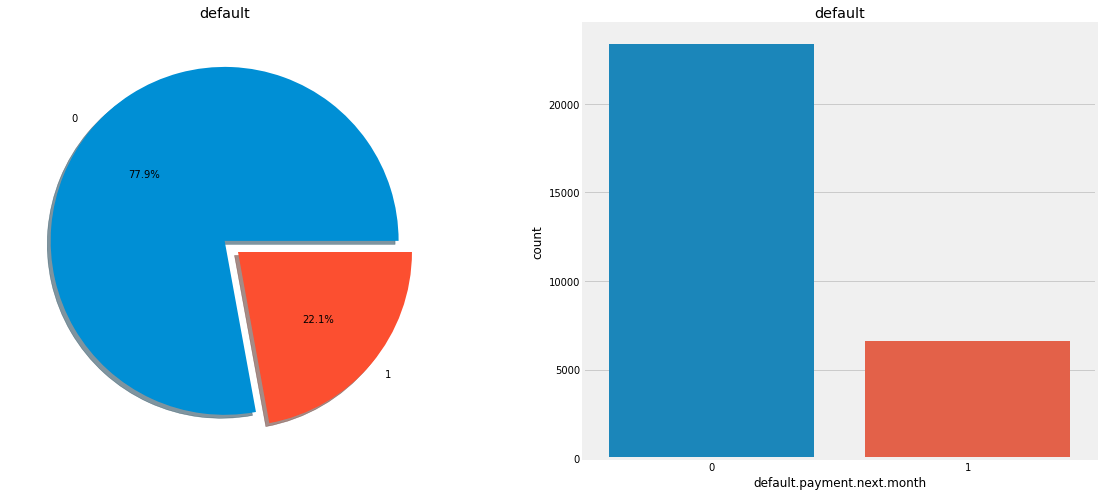

In [ ]:
#How many defaulted
f,ax=plt.subplots(1,2,figsize=(18,8))
data['default.payment.next.month'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('default')
ax[0].set_ylabel('')
sns.countplot('default.payment.next.month',data=data,ax=ax[1])
ax[1].set_title('default')
plt.show()


Around 22% defaulted 

In [ ]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

We have features : ID, LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, 
                   BILL_AMT2,BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5,
                   PAY_AMT6
Target variable as default.payment.next.month
    

In [ ]:
data.drop('ID',1,inplace=True)


In [ ]:
data.rename(columns={'default.payment.next.month':'default_payment_next_month'},inplace=True)

Dropped column "ID" as it is not required further. Also, renamed 'default.payment.next.month' by 'default_payment_next_month' so that python does not get confused with period(.) 

The features in the data can be classified as Categorical, Ordinal and Continuous. 
Categorical Features - SEX
Ordinal Features - EDUCATION, MARRIAGE, PAY_0 - 6
Continuous Features - LIMIT_BAL, AGE, BILL_AMT1 - 6,PAY_AMT1 - 6

Sex -> Categorical

In [ ]:
data.groupby(['SEX','default_payment_next_month'])['default_payment_next_month'].count()

SEX  default_payment_next_month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
Name: default_payment_next_month, dtype: int64

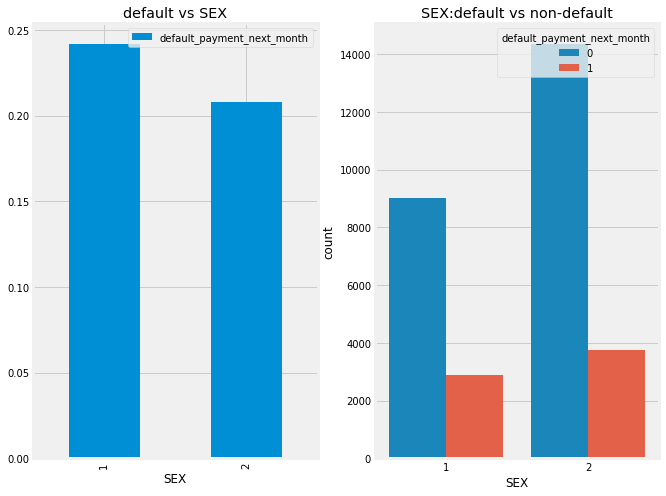

In [ ]:


f,ax=plt.subplots(1,2,figsize=(10,8))
data[['SEX','default_payment_next_month']].groupby(['SEX']).mean().plot.bar(ax=ax[0])
ax[0].set_title('default vs SEX')
sns.countplot('SEX',hue='default_payment_next_month',data=data,ax=ax[1])
ax[1].set_title('SEX:default vs non-default')
plt.show()



The default % for male clients is around (23-24)% and for females is around 21%. 
As per the data female clients are more than male ones.

EDUCATION -> ORDINAL

In [ ]:
pd.crosstab(data.EDUCATION,data.default_payment_next_month,margins=True).style.background_gradient(cmap='summer_r')

default_payment_next_month,0,1,All
EDUCATION,,,
0,14,0,14
1,8549,2036,10585
2,10700,3330,14030
3,3680,1237,4917
4,116,7,123
5,262,18,280
6,43,8,51
All,23364,6636,30000


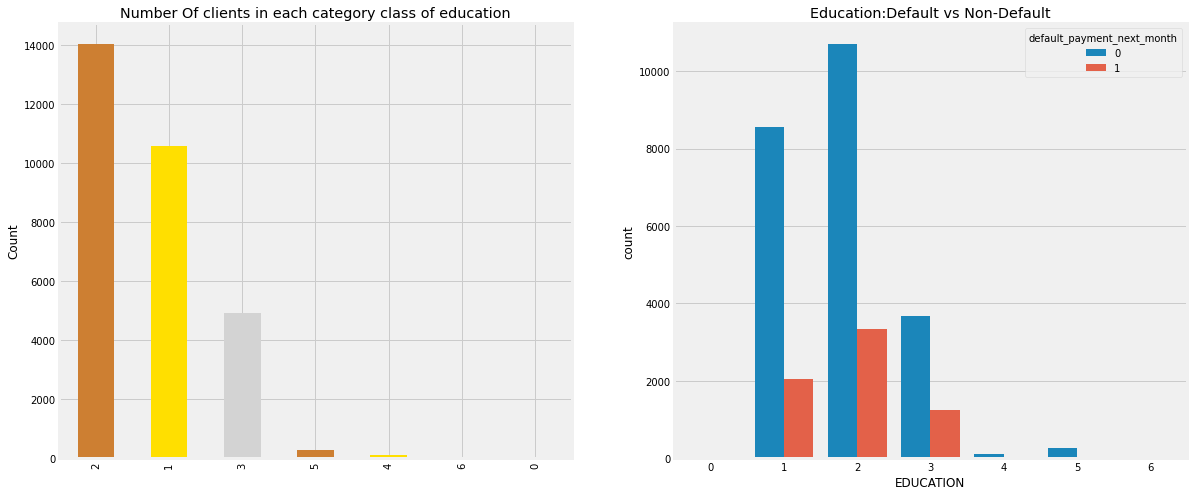

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['EDUCATION'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of clients in each category class of education')
ax[0].set_ylabel('Count')
sns.countplot('EDUCATION',hue='default_payment_next_month',data=data,ax=ax[1])
ax[1].set_title('Education:Default vs Non-Default')
plt.show()

Text(0.5, 1.0, 'average default% as per education class')

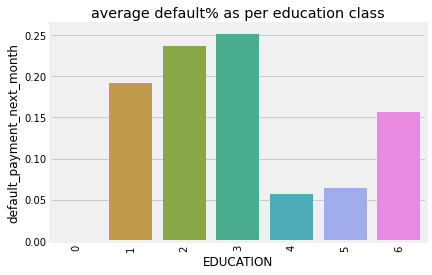

In [ ]:
sns.barplot(x="EDUCATION",y="default_payment_next_month",data=data,ci=None)
plt.xticks(rotation=90)
plt.title('average default% as per education class')

category 3 has the highest default%. 0 has the least percentage but is not defined as per the data description. 
So we can say that clients who are educated till 'High School' are more likely to default.
Let's dig in more of 'EDUCATION'.

Default as per SEX and EDUCATION

In [ ]:
pd.crosstab([data.SEX,data.default_payment_next_month],data.EDUCATION,margins=True).style.background_gradient(cmap='summer_r')

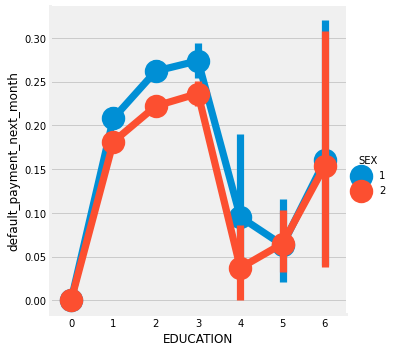

In [ ]:
sns.factorplot('EDUCATION','default_payment_next_month',hue='SEX',data=data)
plt.show()

Default seems to be the highest at category 3 for education both for male and female. For males it is slightly higher than the female by 2-3%. And it is least at category 4. Overall, we see that males default% is greater than that of female except at category 5 where it is almost equal.

Removing Category 0 seems like an error as it is not mentioned in the data description (it is very immaterial percentage and does not have any defaults) 

In [ ]:
indices = data[data['EDUCATION'] == 0].index
#indices
data.drop(indices,axis=0,inplace=True)


In [ ]:
data[data['EDUCATION']==0].values.any()

False

In [ ]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
Name: EDUCATION, dtype: int64

I have removed category 0 for EDUCATION variable since it is not mentioned in the data description and it is very immaterial percentage and does not have any defaults.

MARRIAGE-> ORDINAL


In [ ]:
pd.crosstab(data.MARRIAGE,data.default_payment_next_month,margins=True).style.background_gradient(cmap='summer_r')

default_payment_next_month,0,1,All
MARRIAGE,,,
0,49,5,54
1,10449,3206,13655
2,12613,3341,15954
3,239,84,323
All,23350,6636,29986


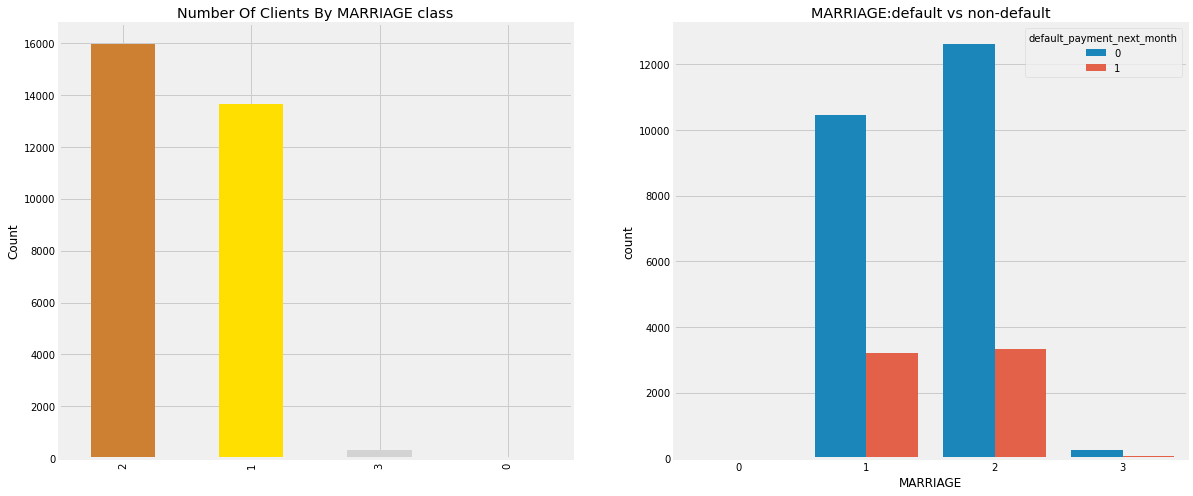

In [ ]:


f,ax=plt.subplots(1,2,figsize=(18,8))
data['MARRIAGE'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Clients By MARRIAGE class')
ax[0].set_ylabel('Count')
sns.countplot('MARRIAGE',hue='default_payment_next_month',data=data,ax=ax[1])
ax[1].set_title('MARRIAGE:default vs non-default')
plt.show()



Text(0.5, 1.0, 'average default% as per marriage class')

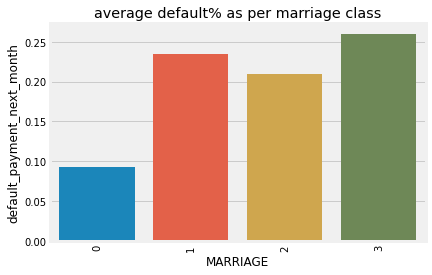

In [ ]:
sns.barplot(x="MARRIAGE",y="default_payment_next_month",data=data,ci=None)
plt.xticks(rotation=90)
plt.title('average default% as per marriage class')

Marriage Category 3 ("other") has the highest default percentage then comes category 1("married") and 2("unmarried"). Though category 3 is very immaterial part of the data but it might be useful in our evaluations since it has the highest percentage of default.

MARRIAGE and SEX

In [ ]:
pd.crosstab([data.SEX,data.default_payment_next_month],data.MARRIAGE,margins=True).style.background_gradient(cmap='summer_r')

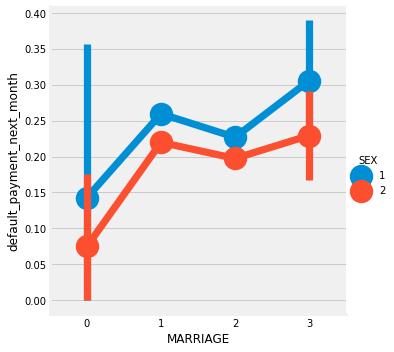

In [ ]:
sns.factorplot('MARRIAGE','default_payment_next_month',hue='SEX',data=data)
plt.show()

It is clear from above that male clients are more likely to default at any category for marriage. 
Category 0 is not mentioned in the data description and is very immaterial (only 55 observations - .2% of the data) and has a very low default percentage(5/54 = 9.26%). So, we will remove these rows.

In [ ]:
indices2 = data[data['MARRIAGE'] == 0].index
indices2
data.drop(indices2,axis=0,inplace=True)

In [ ]:
data[data['MARRIAGE']==0].values.any()

False

In [ ]:
data['MARRIAGE'].value_counts()

2    15954
1    13655
3      323
Name: MARRIAGE, dtype: int64

In [ ]:
data.shape 

(29932, 24)

Rows with category 0 of variable Marriage have been removed

PAY_ -> ORDINAL

CORRELATION MATRIX for PAY_(s)

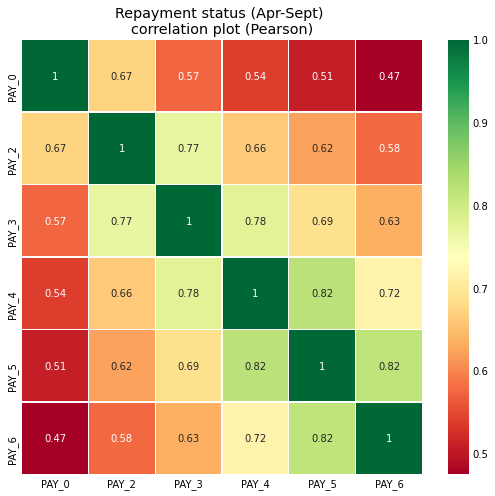

In [ ]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = data[var].corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2)

plt.show()


We see that as the current payment indicator which is PAY_0 has correlations decreasing when the time distance in terms of months keep increasing. But PAY_0 would be more relevant to default/non-default, so we only analyse this header.

PAY_0 -> Ordinal

In [ ]:
pd.crosstab(data.PAY_0,data.default_payment_next_month,margins=True).style.background_gradient(cmap='summer_r')

default_payment_next_month,0,1,All
PAY_0,,,
-2,2385,364,2749
-1,4713,954,5667
0,12827,1886,14713
1,2427,1251,3678
2,820,1843,2663
3,78,244,322
4,24,52,76
5,12,13,25
6,5,6,11


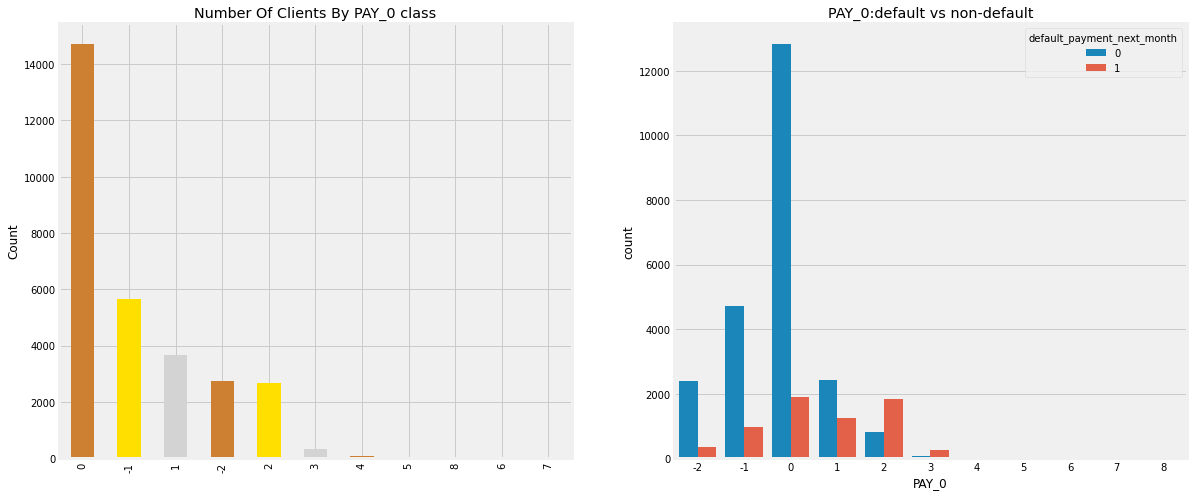

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['PAY_0'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Clients By PAY_0 class')
ax[0].set_ylabel('Count')
sns.countplot('PAY_0',hue='default_payment_next_month',data=data,ax=ax[1])
ax[1].set_title('PAY_0:default vs non-default')
plt.show()


Text(0.5, 1.0, 'average default% as per PAY_0 class')

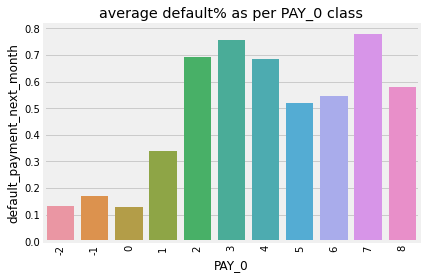

In [ ]:
sns.barplot(x="PAY_0",y="default_payment_next_month",data=data,ci=None)
plt.xticks(rotation=90)
plt.title('average default% as per PAY_0 class')


From the above crosstab we see that there categories 0 and -2 which are no classes as per definition. 0 being at a number 14.7k and 2.7k. 0 is material in the data(almost 50% of the data) so we can't remove these rows. It could be a possible category of payment - "payment which has not been paid for less than a month" and could be missed in the data description. Category -2 has default percentage similar to zero. So, we merge -2 category into 0 category.
We see that maximum default % is at category 7, then 3, 2 , 4, 8, 6 and 5 in the sequence. But we expect that default % increases in order of these categories. It could be that some information regarding these indicators is missing and hence is the reason. .

In [ ]:
data['PAY_0'].replace(-2,0, inplace=True)

In [ ]:
data['PAY_0'].value_counts()

 0    17462
-1     5667
 1     3678
 2     2663
 3      322
 4       76
 5       25
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

We have succesfully replaced category -2 of PAY_0 with 0 category.

AGE-> Continuous

In [ ]:
print('Oldest Passenger was of:',data['AGE'].max(),'Years')
print('Youngest Passenger was of:',data['AGE'].min(),'Years')
print('Average Age on the ship:',data['AGE'].mean(),'Years')

Oldest Passenger was of: 79 Years
Youngest Passenger was of: 21 Years
Average Age on the ship: 35.47972070025391 Years


'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0' are all categorical variables. And we will be combining these variables along with Age to dig in more

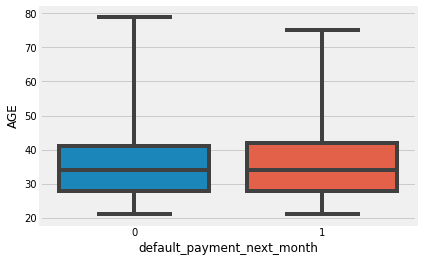

In [ ]:
sns.boxplot(y="AGE",x = "default_payment_next_month",whis=3, data = data)

Most of the default cases lie between the age 30.

LIMIT_BAL -> CONTINIOUS

In [ ]:
print('Maximum Limit Balance was:',data['LIMIT_BAL'].max())
print('Minimum Limit Balance was:',data['LIMIT_BAL'].min())
print('Average Limit Balance was:',data['LIMIT_BAL'].mean())


Maximum Limit Balance was: 1000000.0
Minimum Limit Balance was: 10000.0
Average Limit Balance was: 167523.37565147667


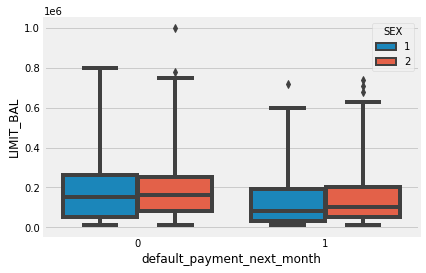

In [ ]:
sns.boxplot(y="LIMIT_BAL", x= "default_payment_next_month", hue = "SEX",whis=3, data = data)


Credit limit is a little higher for females in the case of defaults.

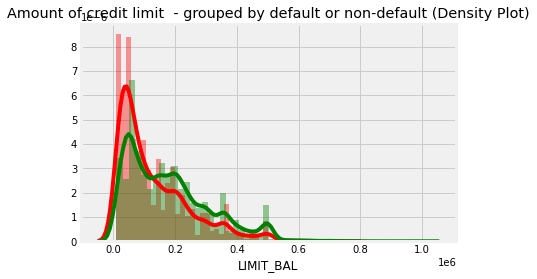

In [ ]:
sns.distplot(data[data['default_payment_next_month']==1]['LIMIT_BAL'],color='red')
sns.distplot(data[data['default_payment_next_month']==0]['LIMIT_BAL'],color='green')
plt.title('Amount of credit limit  - grouped by default or non-default (Density Plot)')
plt.show()

Credit limit is 0-100,000 for most of the defaults. Modal value for the same is around 50,000.

BILL_AMT(s)-> CONTINUOUS

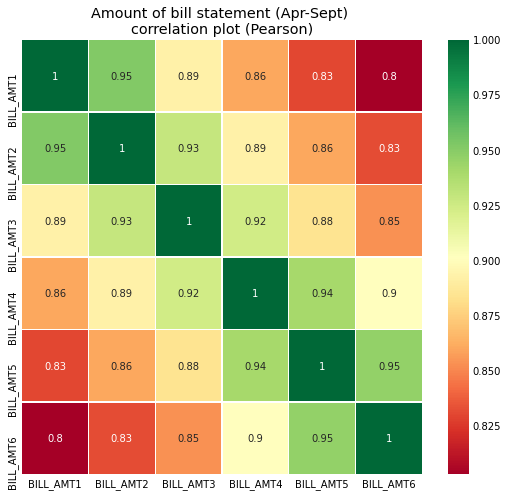

In [ ]:
var2 = ['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr2 = data[var2].corr()
sns.heatmap(corr2,annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()


BILL_AMT(s) are highly correlated with each other. BILL_AMT1 is most relevant since it is the latest. 

BILL_AMT1 

In [ ]:
print('Maximum at Bill Amount 1 is:',data['BILL_AMT1'].max())
print('Minimum at Bill Amount 1 is:',data['BILL_AMT1'].min())
print('Average at Bill Amount 1 is:',data['BILL_AMT1'].mean())


Maximum at Bill Amount 1 is: 964511.0
Minimum at Bill Amount 1 is: -165580.0
Average at Bill Amount 1 is: 51297.38610851263


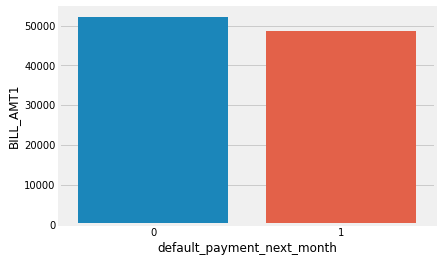

In [ ]:
sns.barplot(x="default_payment_next_month",y="BILL_AMT1",data = data,ci=None)


Average latest bill amount for default is little less than 50,000

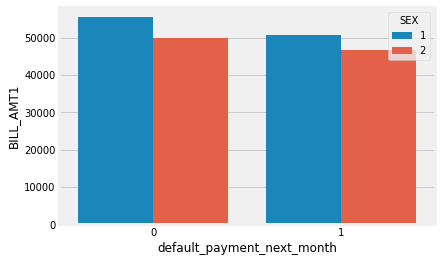

In [ ]:
sns.barplot(x="default_payment_next_month",y="BILL_AMT1",hue = "SEX",data = data,ci=None)


The above plot shows average bill_amount1 for defaultees split between males and females 

In [ ]:
data[((data['default_payment_next_month'] == 1) & (data['BILL_AMT1'] == 0))]['BILL_AMT1'].value_counts()


0.0    534
Name: BILL_AMT1, dtype: int64

In [ ]:
data[(data['default_payment_next_month'] == 1) & (data['BILL_AMT1'] < 0)]['BILL_AMT1'].nunique()


76

Some defaulted people had Bill-amount in September 2005 equal to and less than zero which seems like a contradiction to default (as they should have some bill amount to default)

CORRELATION for 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5' , 'PAY_AMT6' and default

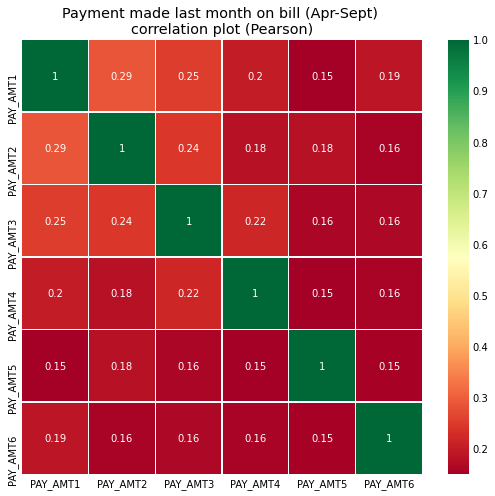

In [ ]:
var3 = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6']

plt.figure(figsize = (8,8))
plt.title('Payment made last month on bill (Apr-Sept) \ncorrelation plot (Pearson)')
corr3 = data[var3].corr()
sns.heatmap(corr3,annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()


PAY_AMT(s) have a very low correlatiion and also the latest is the most relevant. So we only analyse the latest.

PAY_AMT1-> CONTINOUS

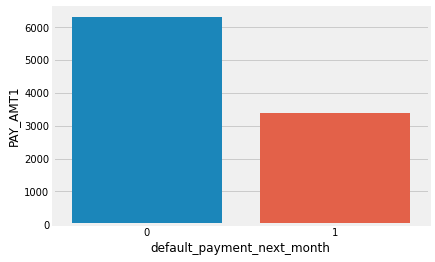

In [ ]:
sns.barplot(x = "default_payment_next_month", y = "PAY_AMT1", data = data, ci=None)


As per the above plot the defaulters have made a previuos payment on the latest bill of an average of 3,500

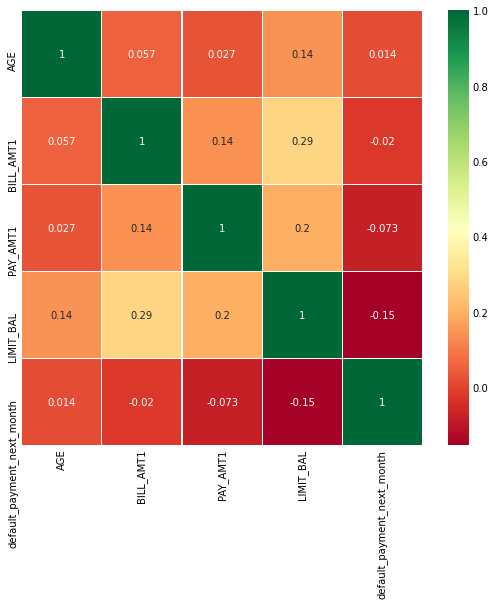

In [ ]:
var4 = ['AGE','BILL_AMT1', 'PAY_AMT1', 'LIMIT_BAL','default_payment_next_month']
plt.figure(figsize = (8,8))
corr4 = data[var4].corr()
sns.heatmap(corr4,annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

As per the above correlation matrix there is not much of correlation b/w the mentioned variables and also the dependent variable.

# Models 

Splitting the data and stratifying the data for model use

In [ ]:
from sklearn.model_selection import train_test_split
G = data.drop(['default_payment_next_month'],1)
h = data['default_payment_next_month']
G = np.array(G)
h = np.array(h)
G_train, G_test, h_train, h_test = train_test_split(G, h, test_size= 0.3, stratify = data['default_payment_next_month'])


In [ ]:
pd.Series(h_train).value_counts()

0    16310
1     4642
dtype: int64

In [ ]:
pd.Series(h_test).value_counts()


0    6991
1    1989
dtype: int64

Scaling done below to Standardise the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
G_train = pd.DataFrame(sc.fit_transform(G_train))
G_test = pd.DataFrame(sc.transform(G_test))


In [ ]:
G_train.head()

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(G_train, h_train) 
h_pred = model.predict(G_test)
acc = accuracy_score(h_test, h_pred)
print('Logistic Regression_Accuracy_Score:', acc * 100)

Logistic Regression_Accuracy_Score: 81.70378619153675


In [ ]:
# Importing the libraries required for ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


For ROC curve we assume no skill model to be ns and lr to be logistic regression. 

In [ ]:
# No skill probability 
ns_probs = [0 for _ in range(len(h_test))] 

In [ ]:
# Probabilities for logistic regression
lr_probs = model.predict_proba(G_test)

In [ ]:
lr_probs = lr_probs[:, 1]

In [ ]:
ns_auc = roc_auc_score(h_test, ns_probs)
lr_auc = roc_auc_score(h_test, lr_probs)

In [ ]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.728


In [ ]:
# Calculation of False Positive Rate and True Positive Rate for No Skill Model and Logistic Regression
ns_fpr, ns_tpr, _ = roc_curve(h_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(h_test, lr_probs)

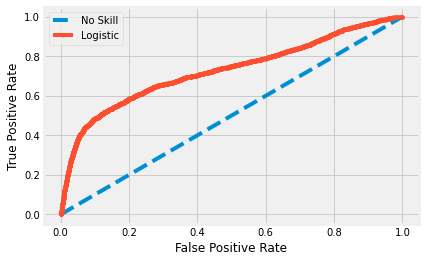

In [ ]:
# Plotting the ROC
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
#SVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier_SVC = SVC(kernel = 'linear', random_state = 42,probability = True,cache_size=700)
classifier_SVC.fit(G_train, h_train)

h_pred_SVC = classifier_SVC.predict(G_test)
acc = accuracy_score(h_test, h_pred_SVC)
print('SVM:', acc * 100) 


SVM: 81.57015590200446


In [ ]:
# No skill probability - should be same for all models 
ns_probs_SVC = [0 for _ in range(len(h_test))]

# Probabilities for SVM
SVC_probs = classifier_SVC.predict_proba(G_test)

SVC_probs = SVC_probs[:, 1]

ns_auc_SVC = roc_auc_score(h_test, ns_probs_SVC)
SVC_auc = roc_auc_score(h_test, SVC_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc_SVC))
print('SVC: ROC AUC=%.3f' % (SVC_auc))


No Skill: ROC AUC=0.500
SVC: ROC AUC=0.703


In [ ]:
#Calculation of False Positive Rate and True Positive Rate for No Skill Model and SVM

ns_fpr_SVC, ns_tpr_SVC, _SVC = roc_curve(h_test, ns_probs_SVC)
SVC_fpr, SVC_tpr, _SVC = roc_curve(h_test, SVC_probs)

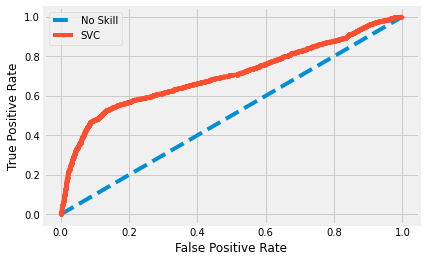

In [ ]:
# Plotting the ROC
plt.plot(ns_fpr_SVC, ns_tpr_SVC, linestyle='--', label='No Skill')
plt.plot(SVC_fpr, SVC_tpr, marker='.', label='SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier_SVC = SVC(kernel = 'rbf', random_state = 42,probability = True,C=.4,gamma=.05)
classifier_SVC.fit(G_train, h_train)

h_pred_SVC = classifier_SVC.predict(G_test)
acc = accuracy_score(h_test, h_pred_SVC)
print('SVM:', acc * 100) 


SVM: 82.21603563474387


Accuracy not getting better using rbf kernel. Use lesser gamma = .1

In [ ]:
# No skill probability - should be same for all models 
ns_probs_SVC = [0 for _ in range(len(h_test))]


In [ ]:
# Probabilities for SVM
SVC_probs = classifier_SVC.predict_proba(G_test)


In [ ]:
SVC_probs = SVC_probs[:, 1]

In [ ]:
ns_auc_SVC = roc_auc_score(h_test, ns_probs_SVC)
SVC_auc = roc_auc_score(h_test, SVC_probs)


In [ ]:
print('No Skill: ROC AUC=%.3f' % (ns_auc_SVC))
print('SVC: ROC AUC=%.3f' % (SVC_auc))


No Skill: ROC AUC=0.500
SVC: ROC AUC=0.734


We saw that the SVC model with rbf kernel has the greatest AUC. So, we choose this model for our prediction.